In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

## Data collection

In [2]:
#reading the train dataset 
data=pd.read_csv("train_qnU1GcL.csv")

In [3]:
#getting the test dataset

data_test=pd.read_csv("test_LxCaReE_DvdCKVT2.csv")
data_test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [4]:
data.shape, data_test.shape

((79853, 12), (34224, 11))

In [5]:
#data types of the columns
data_test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

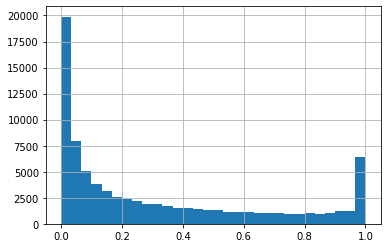

In [6]:
UPPERBOUND,LOWERBOUND=np.percentile(data['perc_premium_paid_by_cash_credit'],[1,99])
y=np.clip(data['perc_premium_paid_by_cash_credit'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

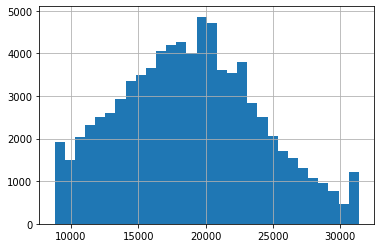

In [7]:
UPPERBOUND,LOWERBOUND=np.percentile(data['age_in_days'],[1,99])
y=np.clip(data['age_in_days'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

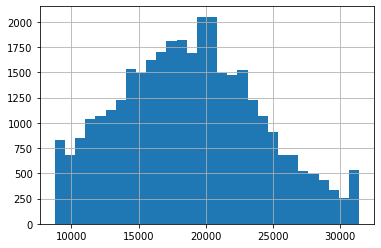

In [8]:
UPPERBOUND,LOWERBOUND=np.percentile(data_test['age_in_days'],[1,99])
y=np.clip(data_test['age_in_days'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

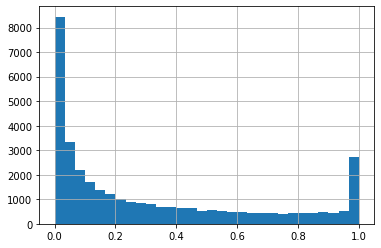

In [9]:
UPPERBOUND,LOWERBOUND=np.percentile(data_test['perc_premium_paid_by_cash_credit'],[1,99])
y=np.clip(data_test['perc_premium_paid_by_cash_credit'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

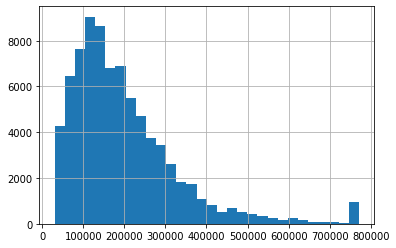

In [10]:
UPPERBOUND,LOWERBOUND=np.percentile(data['Income'],[1,99])
y=np.clip(data['Income'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

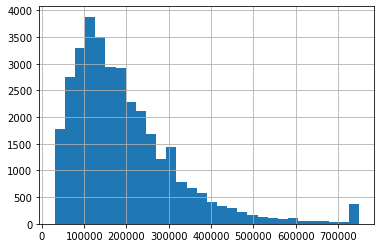

In [11]:
UPPERBOUND,LOWERBOUND=np.percentile(data_test['Income'],[1,99])
y=np.clip(data_test['Income'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:7360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[mask] = np.nan


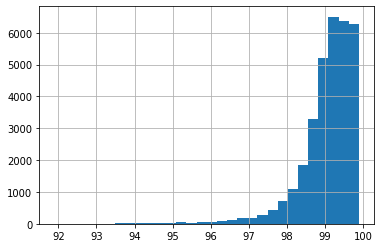

In [12]:
UPPERBOUND,LOWERBOUND=np.percentile(data_test['application_underwriting_score'],[1,99])
y=np.clip(data_test['application_underwriting_score'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

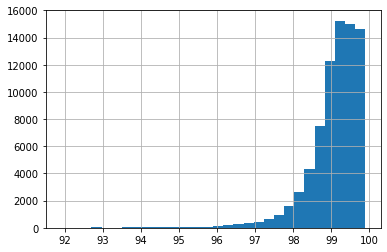

In [13]:
UPPERBOUND,LOWERBOUND=np.percentile(data['application_underwriting_score'],[1,99])
y=np.clip(data['application_underwriting_score'],UPPERBOUND,LOWERBOUND)
pd.Series(y).hist(bins=30)

## Handling outliers


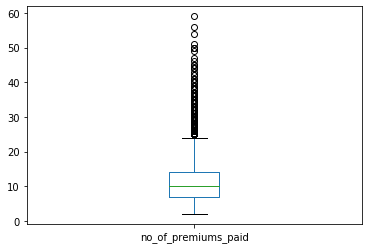

In [14]:
data_test['no_of_premiums_paid'].plot.box()

In [15]:
data.loc[data['age_in_days']>33750,'age_in_days']=data['age_in_days'].quantile(0.75)
data_test.loc[data_test['age_in_days']>33750,'age_in_days']=data_test['age_in_days'].quantile(0.75)

In [16]:
data_test.loc[data_test['application_underwriting_score']<97.8,'application_underwriting_score']=data_test['application_underwriting_score'].quantile(0.25)

In [17]:
data.loc[data['Income']>450000,'Income']=data['Income'].quantile(0.75)

In [18]:
data_test.loc[data_test['Income']>450000,'Income']=data_test['Income'].quantile(0.75)

## Handling missing values

In [19]:
data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,79853.00000,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18835.137966,180861.89373,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5186.876367,91883.41584,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,24030.00000,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,108010.00000,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,166560.00000,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,252090.00000,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,33595.000000,449880.00000,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [20]:
data_test.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,34224.000000,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18812.821470,179752.955820,0.238733,0.080718,0.058111,99.162865,10.890428
std,32935.402647,0.334059,5225.330517,91907.627516,0.686162,0.454634,0.307046,0.476690,5.216867
min,1.000000,0.000000,7671.000000,24030.000000,0.000000,0.000000,0.000000,97.800000,2.000000
25%,28254.750000,0.034000,14972.000000,106397.500000,0.000000,0.000000,0.000000,98.800000,7.000000
50%,56488.000000,0.169000,18623.000000,165070.000000,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,250020.000000,0.000000,0.000000,0.000000,99.530000,14.000000
max,114077.000000,1.000000,33595.000000,450000.000000,12.000000,10.000000,7.000000,99.890000,59.000000


In [21]:
data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [22]:
#data = data.dropna(how='any', subset=['Count_3-6_months_late', 'Count_6-12_months_late','Count_more_than_12_months_late'])
data['Count_3-6_months_late'] = data['Count_3-6_months_late'].replace(np.nan, 0)
data['Count_6-12_months_late'] = data['Count_6-12_months_late'].replace(np.nan, 0)
data['Count_more_than_12_months_late'] = data['Count_more_than_12_months_late'].replace(np.nan, 0)

In [23]:
#data_test= data_test.dropna(how='any', subset=['Count_3-6_months_late', 'Count_6-12_months_late','Count_more_than_12_months_late'])
data_test['Count_3-6_months_late'] = data_test['Count_3-6_months_late'].replace(np.nan, 0)
data_test['Count_6-12_months_late'] = data_test['Count_6-12_months_late'].replace(np.nan, 0)
data_test['Count_more_than_12_months_late'] = data_test['Count_more_than_12_months_late'].replace(np.nan, 0)

#treating the missing values in application_underwriting_score

In [24]:
data.fillna(data["application_underwriting_score"].mean(), inplace = True)
data_test.fillna(data_test["application_underwriting_score"].mean(), inplace = True) 

## Encoding catagorical features 

In [25]:
data_test['sourcing_channel'].value_counts()

A    18672
B     6923
C     5146
D     3222
E      261
Name: sourcing_channel, dtype: int64

In [26]:
data_tr=data.copy()
type(data_tr)

pandas.core.frame.DataFrame

In [27]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data_tr['residence_area_type']= label_encoder.fit_transform(data_tr['residence_area_type']) 
  
data_tr['residence_area_type'].unique() 

array([1, 0])

In [28]:
data_test['residence_area_type']=label_encoder.transform(data_test['residence_area_type']) 

In [29]:
data_test.head(10)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384.0,51150.0,0.0,0.0,0.0,99.890000,7,A,0
1,81136,0.124,23735.0,285140.0,0.0,0.0,0.0,98.930000,19,A,1
2,70762,1.000,17170.0,186030.0,0.0,0.0,0.0,99.162865,2,B,1
3,53935,0.198,16068.0,123540.0,0.0,0.0,0.0,99.000000,11,B,0
4,15476,0.041,10591.0,200020.0,1.0,0.0,0.0,99.170000,14,A,0
5,64797,0.112,16065.0,245130.0,0.0,0.0,0.0,98.880000,7,B,0
6,67412,0.325,17167.0,388050.0,6.0,0.0,0.0,99.000000,27,C,1
7,44241,0.362,20085.0,99880.0,3.0,0.0,0.0,98.400000,14,A,1
8,5069,0.115,23008.0,360040.0,0.0,0.0,0.0,99.880000,6,D,0
9,16615,0.021,21906.0,250020.0,0.0,0.0,0.0,99.890000,11,B,1


#combine the data if all the late payments under one column
#Count_more_than_12_months_late is worse than Count_6-12_months_late is inturn worse than Count_3-6_months_late 
#As later the payment was made, the more disadvantageous it is to the insurance company

In [30]:
data_tr['count']=data_tr['Count_3-6_months_late']+(3*data_tr['Count_6-12_months_late'])+(4*data_tr['Count_more_than_12_months_late'])

In [31]:
data_test['count']=data_test['Count_3-6_months_late']+(3*data_test['Count_6-12_months_late'])+(4*data_test['Count_more_than_12_months_late'])

In [32]:
data_tr.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,count
0,110936,0.429,12058.0,355060.0,0.0,0.0,0.0,99.02,13,C,1,1,0.0
1,41492,0.010,21546.0,315150.0,0.0,0.0,0.0,99.89,21,A,1,1,0.0
2,31300,0.917,17531.0,84140.0,2.0,3.0,1.0,98.69,7,C,0,0,15.0
3,19415,0.049,15341.0,250510.0,0.0,0.0,0.0,99.57,9,A,1,1,0.0
4,99379,0.052,31400.0,198680.0,0.0,0.0,0.0,99.87,12,B,1,1,0.0


In [33]:
#For the column sourcing_channel, I will replace the values with the frequency of the same. 
#I think that replacing values with its frequency would be effective for this particular column.

#calculate the frequency of each value in the column and store it in a dictionary
freq_map_train=data_tr.sourcing_channel.value_counts().to_dict()
freq_map_test=data_test.sourcing_channel.value_counts().to_dict()

In [34]:
#map those frequencies to the respective values in the column 
data_tr.sourcing_channel=data_tr.sourcing_channel.map(freq_map_train)
data_test.sourcing_channel=data_test.sourcing_channel.map(freq_map_test)
data_test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,count
0,649,0.001,27384.0,51150.0,0.0,0.0,0.0,99.890000,7,18672,0,0.0
1,81136,0.124,23735.0,285140.0,0.0,0.0,0.0,98.930000,19,18672,1,0.0
2,70762,1.000,17170.0,186030.0,0.0,0.0,0.0,99.162865,2,6923,1,0.0
3,53935,0.198,16068.0,123540.0,0.0,0.0,0.0,99.000000,11,6923,0,0.0
4,15476,0.041,10591.0,200020.0,1.0,0.0,0.0,99.170000,14,18672,0,1.0


In [35]:
data_tr.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,count
0,110936,0.429,12058.0,355060.0,0.0,0.0,0.0,99.02,13,12039,1,1,0.0
1,41492,0.010,21546.0,315150.0,0.0,0.0,0.0,99.89,21,43134,1,1,0.0
2,31300,0.917,17531.0,84140.0,2.0,3.0,1.0,98.69,7,12039,0,0,15.0
3,19415,0.049,15341.0,250510.0,0.0,0.0,0.0,99.57,9,43134,1,1,0.0
4,99379,0.052,31400.0,198680.0,0.0,0.0,0.0,99.87,12,16512,1,1,0.0


In [36]:
data_te=data_test.copy()
data_tra=data_tr.copy()

In [37]:
data_te=data_te.drop(['id', 'Count_3-6_months_late', 'Count_6-12_months_late','Count_more_than_12_months_late'], axis=1)
data_tra=data_tra.drop(['id', 'Count_3-6_months_late', 'Count_6-12_months_late','Count_more_than_12_months_late','target'],axis=1)

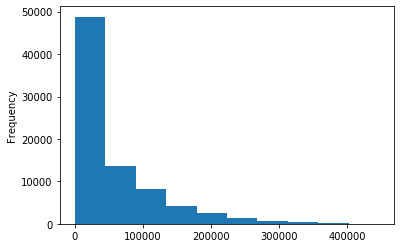

In [38]:
data_tra['prem']=data_tra['perc_premium_paid_by_cash_credit']*data_tra['Income']
data_te['prem']=data_te['perc_premium_paid_by_cash_credit']*data_te['Income']
data_tra['prem'].plot.hist()

## Scaling and preprocessing of data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(data_tra[['Income','age_in_days']])

array([[ 1.89587202, -1.30660149],
       [ 1.46151453,  0.52264192],
       [-1.05266547, -0.25143189],
       ...,
       [ 1.35126543,  0.87468644],
       [-1.54035175,  0.73375296],
       [ 1.08048582, -0.60270524]])

In [40]:
data_tra.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,count,prem
0,0.429,12058.0,355060.0,99.02,13,12039,1,0.0,152320.74
1,0.010,21546.0,315150.0,99.89,21,43134,1,0.0,3151.50
2,0.917,17531.0,84140.0,98.69,7,12039,0,15.0,77156.38
3,0.049,15341.0,250510.0,99.57,9,43134,1,0.0,12274.99
4,0.052,31400.0,198680.0,99.87,12,16512,1,0.0,10331.36


In [41]:
data_tra['Income']=scaler.fit_transform(data_tra[['Income']])

In [42]:
data_te['Income']=scaler.fit_transform(data_te[['Income']])
data_tra['age_in_days']=scaler.fit_transform(data_tra[['age_in_days']])
data_te['age_in_days']=scaler.fit_transform(data_te[['age_in_days']])
data_tra['application_underwriting_score']=scaler.fit_transform(data_tra[['application_underwriting_score']])
data_te['application_underwriting_score']=scaler.fit_transform(data_te[['application_underwriting_score']])
data_tra['prem']=scaler.fit_transform(data_tra[['prem']])
data_te['prem']=scaler.fit_transform(data_te[['prem']])

In [43]:
data_tra['sourcing_channel']=(data_tra['sourcing_channel']*0.0001)


In [44]:
data_te['sourcing_channel']=(data_te['sourcing_channel']*0.0001)

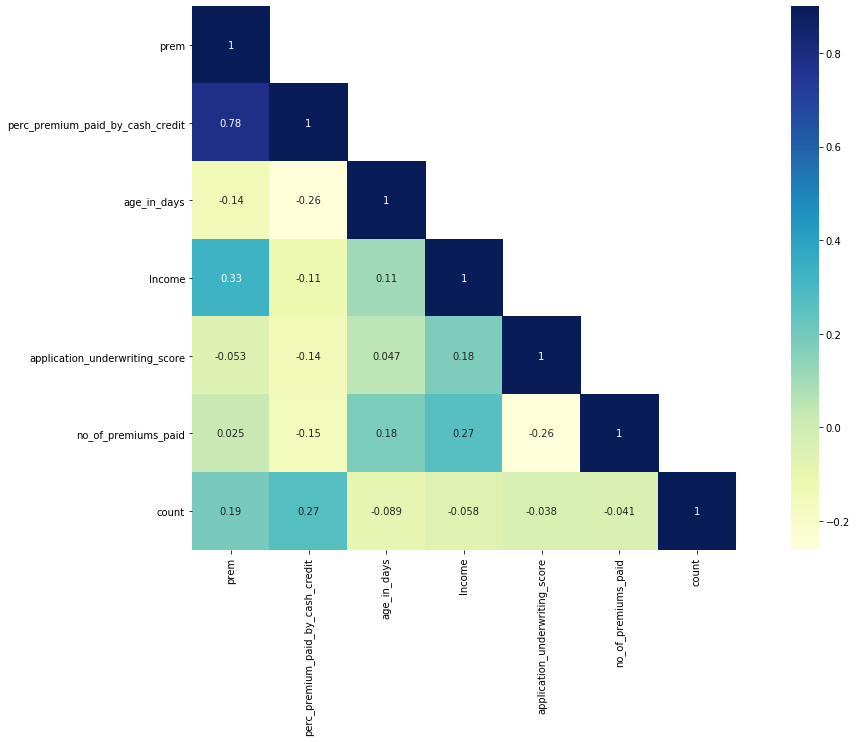

In [45]:
# looking at the correlation between numerical variables
corr = data_tra[["prem","perc_premium_paid_by_cash_credit","age_in_days","Income","application_underwriting_score","no_of_premiums_paid","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [46]:
data_tra['prem1']=np.power((data_tra['prem']),1/3)
data_te['prem1']=np.power((data_te['prem']),1/3)


In [47]:
data_tra['prem1']=scaler.fit_transform(data_tra[['prem1']])
data_te['prem1']=scaler.fit_transform(data_te[['prem1']])

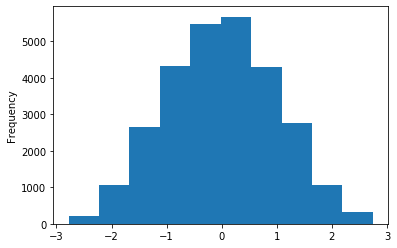

In [48]:
np.power((data_tra['prem1']),1).plot.hist()

#Variable transformation 

In [49]:
data_tra['Income']=np.sqrt(data_tra['Income'])
data_te['Income']=np.sqrt(data_te['Income'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
data_tra['perc_premium']=np.power((data_tra['perc_premium_paid_by_cash_credit']),1/3)
data_te['perc_premium']=np.power((data_te['perc_premium_paid_by_cash_credit']),1/3)

In [51]:
data_tra['application_underwriting_score']=np.power((data_tra['application_underwriting_score']),1/2)
data_te['application_underwriting_score']=np.power((data_te['application_underwriting_score']),1/2)

In [52]:
data_tra['no_premiums_paid']=scaler.fit_transform(data_tra[['no_of_premiums_paid']])
data_te['no_premiums_paid']=scaler.fit_transform(data_te[['no_of_premiums_paid']])

In [53]:
data_tra['no_of_premiums_paid']=np.power((data_tra['no_of_premiums_paid']),1/3)
data_te['no_of_premiums_paid']=np.power((data_te['no_of_premiums_paid']),1/3)

In [54]:
data_tra['sc']=scaler.fit_transform(data_tra[['sourcing_channel']])
data_te['sc']=scaler.fit_transform(data_te[['sourcing_channel']])

In [55]:
data_tra.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,count,prem,prem1,perc_premium,no_premiums_paid,sc
0,0.429,-1.306601,1.376907,NaN,2.351335,1.2039,1,0.0,1.492298,0.675316,0.754199,0.413122,-1.127161
1,0.010,0.522642,1.208931,1.064605,2.758924,4.3134,1,0.0,-0.756642,NaN,0.215443,1.960315,0.909370
2,0.917,-0.251432,NaN,NaN,1.912931,1.2039,0,15.0,0.359088,-0.663812,0.971531,-0.747272,-1.127161
3,0.049,-0.673654,0.870638,0.832192,2.080084,4.3134,1,0.0,-0.619092,NaN,0.365931,-0.360474,0.909370
4,0.052,2.422448,0.440366,1.051585,2.289428,1.6512,1,0.0,-0.648395,NaN,0.373251,0.219723,-0.834207


In [56]:
data_tra['in']=data['Income']

In [57]:
data_te['in']=data_test['Income']

In [58]:
data_tra['app']=data['application_underwriting_score']
data_te['app']=data_test['application_underwriting_score']

In [59]:
from sklearn.preprocessing import MinMaxScaler
scalerr = MinMaxScaler()
data_tra['app']=scaler.fit_transform(data_tra[['app']])
data_te['app']=scaler.fit_transform(data_te[['app']])
data_tra['in']=scaler.fit_transform(data_tra[['in']])
data_te['in']=scaler.fit_transform(data_te[['in']])

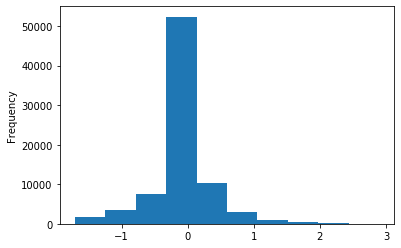

In [60]:
data_tra['prem2']=data_tra['perc_premium_paid_by_cash_credit']*data_tra['in']
data_te['prem2']=data_te['perc_premium_paid_by_cash_credit']*data_te['in']
data_tra['prem2'].plot.hist()

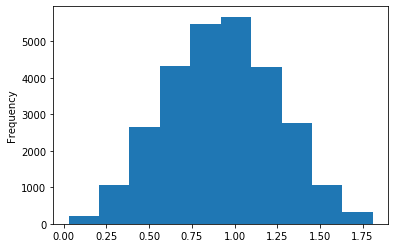

In [61]:
np.power((data_tra['prem']),1/3).plot.hist()

## Model building

In [62]:
from sklearn.linear_model import LinearRegression
# initialize the linear regression model
Model = LinearRegression()

In [63]:
X_train = data_tra.drop(['sourcing_channel', 'no_of_premiums_paid','Income','application_underwriting_score','prem1'], axis=1)
y_train = (data['target'])
X_val = data_te.drop(['sourcing_channel', 'no_of_premiums_paid','Income','application_underwriting_score','prem1'], axis=1)

In [64]:
X=X_train.copy()
Y=data['target']
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,Y)
for train_index, test_index in skf.split(X,Y):
    print("Train: ", train_index, "Validation: ", test_index)
    X1_train, X1_test, y1_train, y1_test=X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    Model.fit(X1_train,y1_train) # fitting the model on X1_train and y1_train
    prediction=Model.predict(X1_test)
    score=accuracy_score(prediction.round(),y1_test)
    accuracy.append(score)
print(accuracy)

Train:  [ 7971  7972  7973 ... 79850 79851 79852] Validation:  [   0    1    2 ... 8106 8139 8173]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [ 7971  7972  7973 ... 15980 15981 15983]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [15926 15930 15931 ... 24004 24005 24006]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [23261 23268 23280 ... 32026 32027 32028]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [30613 30623 30643 ... 39985 39988 39989]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [38973 38988 38989 ... 47974 47976 47977]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [46872 46875 46880 ... 55944 55945 55946]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [55111 55113 55153 ... 63909 63910 63911]
Train:  [    0     1     2 ... 79850 79851 79852] Validation:  [63348 63364 63371 ... 71876 71877 71880]
Train:  [    0     1     2 ... 71876 71877 71880] Validation:

In [65]:

ans=Model.predict(X_val)

## save the predictions in a csv file

In [66]:
solution = pd.DataFrame()
# creating a target column and saving the predictions in it
solution['id']=data_test['id']
solution['target'] = ans
solution.to_csv('sollr.csv', header=True, index=False)


In [67]:
X_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,residence_area_type,count,prem,perc_premium,no_premiums_paid,sc,in,app,prem2
0,0.429,-1.306601,1,0.0,1.492298,0.754199,0.413122,-1.127161,1.895872,-0.065150,0.813329
1,0.010,0.522642,1,0.0,-0.756642,0.215443,1.960315,0.909370,1.461515,1.133384,0.014615
2,0.917,-0.251432,0,15.0,0.359088,0.971531,-0.747272,-1.127161,-1.052665,-0.519766,-0.965294
3,0.049,-0.673654,1,0.0,-0.619092,0.365931,-0.360474,0.909370,0.758010,0.692544,0.037142
4,0.052,2.422448,1,0.0,-0.648395,0.373251,0.219723,-0.834207,0.193922,1.105831,0.010084
